In [22]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [23]:

np.random.seed(42)

rows = 200

distance = np.random.uniform(1, 25, rows)
duration = np.random.uniform(5, 60, rows)

time_of_day = np.random.choice(['Morning','Afternoon','Evening','Night'], rows)
traffic = np.random.choice(['Low','Medium','High'], rows)
weather = np.random.choice(['Clear','Rainy','Foggy'], rows)
demand = np.random.choice(['Low','Medium','High'], rows)
vehicle = np.random.choice(['Standard','Premium','SUV'], rows)

price = []

for i in range(rows):
    base = 2
    p = base + distance[i]*1.5 + duration[i]*0.3

    if traffic[i] == 'High':
        p += 5
    if demand[i] == 'High':
        p += 6
    if weather[i] == 'Rainy':
        p += 4
    if vehicle[i] == 'Premium':
        p += 5
    if vehicle[i] == 'SUV':
        p += 8

    p += random.uniform(-3,3)
    price.append(p)

df = pd.DataFrame({
    'distance_km': distance,
    'duration_min': duration,
    'time_of_day': time_of_day,
    'traffic_level': traffic,
    'weather': weather,
    'demand_level': demand,
    'vehicle_type': vehicle,
    'ride_price': price
})

df.head()

,distance_km,duration_min,time_of_day,traffic_level,weather,demand_level,vehicle_type,ride_price
0,9.988963,40.311741,Morning,Medium,Foggy,Medium,SUV,36.344058
1,23.817143,9.627698,Afternoon,High,Rainy,Medium,SUV,56.526516
2,18.567855,13.889579,Morning,Low,Rainy,High,SUV,49.548344
3,15.367804,54.420480,Morning,Low,Rainy,High,SUV,58.593186
4,4.744447,38.353598,Afternoon,Low,Foggy,High,Standard,29.617519


In [24]:
df.to_csv("rides.csv", index=False)

In [ ]:

df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance_km    200 non-null    float64
 1   duration_min   200 non-null    float64
 2   time_of_day    200 non-null    object 
 3   traffic_level  200 non-null    object 
 4   weather        200 non-null    object 
 5   demand_level   200 non-null    object 
 6   vehicle_type   200 non-null    object 
 7   ride_price     200 non-null    float64
dtypes: float64(3), object(5)
memory usage: 12.6+ KB


,0
distance_km,0
duration_min,0
time_of_day,0
traffic_level,0
weather,0
demand_level,0
vehicle_type,0
ride_price,0


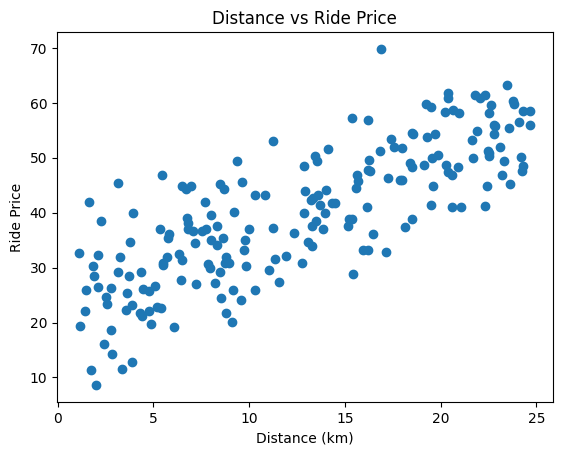

In [ ]:
plt.scatter(df['distance_km'], df['ride_price'])
plt.xlabel("Distance (km)")
plt.ylabel("Ride Price")
plt.title("Distance vs Ride Price")
plt.show()

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[['distance_km','duration_min']] = scaler.fit_transform(
    df_encoded[['distance_km','duration_min']]
)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

X = df_encoded.drop('ride_price', axis=1)
y = df_encoded['ride_price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 1.2403367894464015
R2 Score: 0.9840375522881437


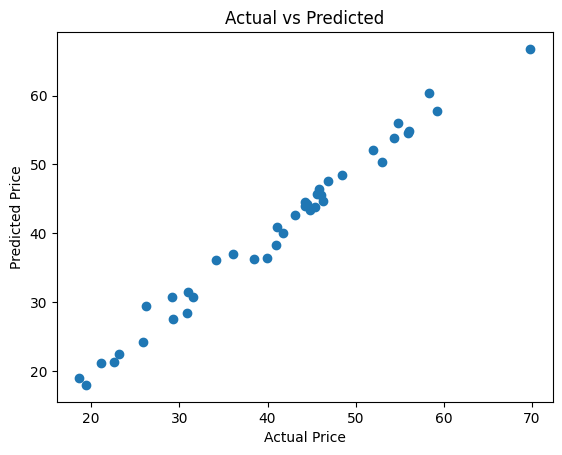

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()

In [ ]:
df_encoded['high_cost'] = df_encoded['ride_price'] > df_encoded['ride_price'].median()

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

X = df_encoded.drop(['ride_price','high_cost'], axis=1)
y = df_encoded['high_cost']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9
Confusion Matrix:
 [[16  0]
 [ 4 20]]


In [ ]:
from google.colab import files
files.download('/content/ride_price_model.ipynb')

FileNotFoundError: Cannot find file: /content/ride_price_model.ipynb

In [ ]:
import os
os.listdir('/content')

['.config', 'rides.csv', 'sample_data']

ML Problem

This is a supervised regression problem predicting ride price.

Why ML?

Ride pricing depends on multiple interacting factors like traffic and demand.

Most Important Feature

Distance_km has strongest influence because price increases directly with distance.

Ethical Issue

Surge pricing may unfairly affect low-income users.

In [ ]:
from google.colab import files
files.download("rides.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Dataset Limitation

Synthetic data may not reflect real-world complexity.